In [2]:
import tweepy
from tweepy import API,  OAuthHandler
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import hvplot.pandas 
from textblob import TextBlob
from IPython.display import Markdown

pd.set_option("display.max_rows", 2000)
pd.set_option("display.max_columns", 2000)
pd.set_option("display.width", 1000)


In [3]:
auth = tweepy.OAuthHandler("VnYIPNiLtsQGwl1GwkXGqoIJ5", "1aYDyWB10FemMgLqPlTqtyvcQkqO52Vv05ZmajqF8N0ixPmbsq")
auth.set_access_token("836272128911622144-tOkJKzdBgVozezfnJ003a3yGIZiyyqz", "uK3qAtLc19RxegiEpYX74zkFPNQ1WatQQsk8igUeVEdI4")

api = tweepy.API(auth)


Enter stock symbol: rbc


RBC stock
$ROLL RBC Bearings Incorporated Announces Fiscal 2021 Third Quarter Results
From our Stock News Alerts App
$ROLL RBC Bearings Incorporated Announces Fiscal 2021 Third Quarter Results
https://t.co/AVpKx08V8D
@stock_family I was locked out of two different brokerage  accounts most of the day. Td and rbc with technical Issues (complete bs)
$BLU, and so it begins, getting closer to try and fill that gap. Analyst updates are a good start. Starts bringing… https://t.co/SAQxPDSlM3
RT @StephenPunwasi: Hilarious. There's internet outages across the US, that only seem to impacting retail stock market brokerages. 

RBC an…
@reciknows @rbc_trading I believe AMD is still in stock dweebs buy Zone and has not hit his stop loss.
@RBC I was going to sell one of my stock when it was at 126% gain, just because of RBC direct investing dmsustem do… https://t.co/ChFF38y2xL
I was going to sell one of my stock when it was at 126% gain, just because of RBC direct investing dmsustem down I… https://t.

,Tweets
0,RT @yteverywear: YUTA x Man.G https://t.co/uqn...
1,RT @mgyarchives: [IG] #MoonGayoung | #문가영 x #C...
2,RT @jackcoke21: やまびこに木戸を任せたら\n返ってきた釣り銭箱の中身がめちゃ...
3,"｢5,9,1｣\n(ｻﾞﾙﾀﾞﾝ)やめろ！\nルパンコレクションはいただいたよ。"
4,@The_FirstTake @TXT_bighit_jp OMG!!! Thank you...
5,RT @TXT_BBSocial50: Comment a word to describe...
6,RT @ZsnpYd: เอาจริงน้องเยดัมกับจุนกยูเวลาเล่นเ...
7,みんなのリズ天でレスラー会見がバチくそに笑えるもう腹よじれる
8,@X_SRo0li خليها تجرب تسرق منك وتفتخر بذوقك
9,x


2021-01-29 13:15:59


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\pjbla\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,Tweets,polarity
0,RT @yteverywear: YUTA x Man.G https://t.co/uqn...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,RT @mgyarchives: [IG] #MoonGayoung | #문가영 x #C...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,RT @jackcoke21: やまびこに木戸を任せたら\n返ってきた釣り銭箱の中身がめちゃ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,"｢5,9,1｣\n(ｻﾞﾙﾀﾞﾝ)やめろ！\nルパンコレクションはいただいたよ。","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,@The_FirstTake @TXT_bighit_jp OMG!!! Thank you...,"{'neg': 0.0, 'neu': 0.655, 'pos': 0.345, 'comp..."


# Twitter Vader Sentiment

:Bars   [index,Variable]   (value)

<AxesSubplot:title={'center':'RBC'}, ylabel='None'>

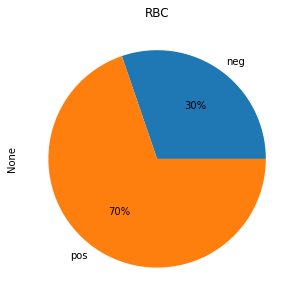

In [7]:
random = 1 
while random == 1:
    w = input('Enter stock symbol:').upper()
    random = 0
    if w == 'SHOP':
        x = 'SHOP stock'
    elif w == 'RBC': 
        x = 'RBC stock'
    elif w == "ABX":
        x = 'ABX stock'
    elif w == "ENB":
        x = ' Enbridge stock'
    else:
        print('Sorry try again from our list: SHOP, ABX, RBC or ENB')
        random = 1
print(x)
#return(x)
#Textblob sentiment
#return x
sentiment = api.search(x)

for tweet in sentiment:
    text = tweet.text

    print(text)
 

   

polarity = TextBlob(text).sentiment.polarity
polarity

#from tweepy import API,  OAuthHandler
from textblob import TextBlob
#from API_KEYS import api_key, api_secret_key

def clean_tweets(tweet):
    tweet_words = str(tweet).split(' ')
    clean_words = [word for word in tweet_words if not word.startswith('#')]
    return ' '.join(clean_words)

def analyze(Topic):
    positive_tweets, negative_tweets = [], []
    #authentication = OAuthHandler(api_key, api_secret_key)
    #api = api_one
    public_tweets = api.search(Topic, count=10)
    cleaned_tweets = [clean_tweets(tweet.text) for tweet in public_tweets]
    for tweet in cleaned_tweets:
        tweet_polarity = TextBlob(tweet).sentiment.polarity
        if tweet_polarity<0:
            negative_tweets.append(tweet)
            continue
        positive_tweets.append(tweet)
    return positive_tweets, negative_tweets


positive, negative = analyze(x)
print(positive , '\n\n', negative)
print(len(positive), ' VS  ', len(negative))
#print(tweet_polarity)

#api = api_one

tweets = api.search('x', count=100)

data = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

display(data.head(10))

print (tweets[0].created_at)

#Vader Sentiment
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()



sid = SentimentIntensityAnalyzer()

listy =[]

for index,row in data.iterrows():
    ss = sid.polarity_scores(row["Tweets"])
    listy.append(ss)
    
se = pd.Series(listy)
data['polarity'] = se.values

display(data.head())

tsx_sym = pd.DataFrame(listy)
tsx_sym.head()
tsx_sym

tsx_sym.describe()

#tsx_sym.plot()

#tsx_sym.plot(kind='bar')


import seaborn as sns
import matplotlib.pyplot as plt

graph_two = tsx_sym.hvplot.bivariate('neg', 'pos', legend=False, width=500, height=400) * \
tsx_sym.hvplot.scatter(  'neg', 'pos', color='black', size=15, legend=False) +\
tsx_sym.hvplot.table(['neg', 'pos'], width=350, height=350)
#graph_two

graph_one = tsx_sym.hvplot.area(titlex='w', y=['neg', 'pos'], x_label = "tweets", stacked=False, alpha=0.4)
#graph_one

scatter_one = tsx_sym.hvplot(kind='scatter')
#scatter_one


bar_one = tsx_sym.hvplot.bar(title=w, xlabel="tweets", x='index', y=['neg', 'pos'],
                 stacked=True, rot=90, width=800, legend='top_left')

#df = pd.DataFrame({'tweets': [len(positive), len(negative)]})
                   
                  #index=['positive', 'negative'])
#pi_chart = df.plot.pie(title=w, y='tweets', figsize=(5, 5))

pie_df = tsx_sym.drop(columns=['compound', 'neu'])
sum_df= pie_df.sum(axis=0)
#pi_chart2 = sum_df.plot.pie(title=w, y='Total', figsize=(5, 5))

pi_chart2 = sum_df.plot.pie(title=w, y='Total', figsize=(5, 5),autopct='%.0f%%')

display(Markdown("# Twitter Vader Sentiment"))
display(bar_one)
#display(scatter_one + graph_one)
#display(graph_two)
#display(tsx_sym.plot(kind='bar') 
#tsx_sym.hvplot() 
#tsx_sym.head()
bar_one
pi_chart2
#pi_chart

#tsx_sym

In [8]:
tsx_sym.head()


,compound,neg,neu,pos
0,0.0000,0.0,1.000,0.000
1,0.0000,0.0,1.000,0.000
2,0.0000,0.0,1.000,0.000
3,0.0000,0.0,1.000,0.000
4,0.7808,0.0,0.655,0.345
